In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on New Synthetic Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"                    # network generative model type
N = 2000                        # number of nodes
m = 4                           # minimun degree (proxy of density)
H = 0.1                         # homophily
B = 0.3                         # class balance (minority fraction)
sampling = "nedges"             # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.8                    # fraction of nodes to sample 
epoch = 1                       # epoch (iteration number #)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network(kind)
net.create_network(N=N,m=m,B=B,H=H)
net.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 2000
Number of edges: 7984
Average degree:   7.9840
{'h': 0.1, 'km': 12.645, 'n': 2000, 'fullname': 'BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.6-kM6.0', 'attributes': ['color'], 'name': 'homophilic_barabasi_albert', 'kind': 'BAH', 'e': 7984, 'group': ['M', 'm'], 'density': 0.00399399699849925, 'B': 0.3, 'x': 1, 'labels': ['blue', 'red'], 'class': 'color', 'm': 4, 'k': 7.984, 'kM': 5.986428571428571, 'b': 0.3, 'N': 2000, 'i': 1, 'min_degree': 4, 'H': 0.1}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 1600
Number of edges: 2016
Average degree:   2.5200
{'h': 0.1, 'epoch': 1, 'km': 3.846307385229541, 'pseeds': 0.8, 'fullname': 'BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.6-kM6.0', 'attributes': ['color'], 'name': 'homophilic_barabasi_albert', 'kind': 'BAH', 'density': 0.001575984990619137, 'H': 0.15273439370228808, 'i': 1, 'e': 2016, 'B': 0.313125, 'x': 1, 'labels': ['blue', 'red'], 'class': 'color', 'm': 1, 'k': 2.52, 'method': 'nedges', 'N': 1600, 'group': ['M', 'm'], 'kM': 1.9153776160145586}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

blue    0.686642
red     0.313358
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          blue       red
blue  0.147603  0.852397
red   0.931052  0.068948


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(2.283004324155697e-09, 3.1727038104920535e-05, 4.2666579970886225e-10, 0.0015211113952837594, 9.96719689513965e-06)

Prediction in 207.2393672466278 seconds
ROCAUC: 0.9974160206718347
ROCAUC curve: 0.9974160206718347
MAE: 0.025
ccm: 0.9393939393939394
ccM: 0.9867109634551495
bias: 0.487716914070667

BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.6-kM6.0_nedges creating...
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.6-kM6.0_nedges created!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.6-kM6.0_nedges/P80_graph.gpickle saved!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.6-kM6.0_nedges/P80_samplegraph.gpickle saved!
BAH-N2000-m4-B0.3-H0.1-i1-x1-h0.1-k8.0-km12.6-kM6.0_nedges/P80_evaluation.pickle saved!


<h2>5. Results</h2>

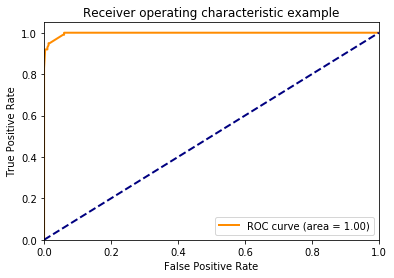

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)